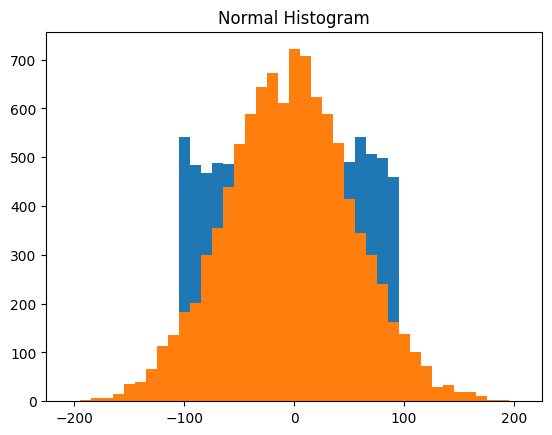

In [2]:
# EXPLORANDO DADOS UNIDIMENSIONAIS

# 1° passo - computar estatísticas sumárias: tamanho da amostra, valores máx, mín, desvio-padrão, média...

# 2° passo - criar um histograma, com buckets bem discretos e contar quantos pontos entram em cada um deles

from typing import List, Dict
from collections import Counter
import math
import matplotlib.pyplot as plt

def bucketize(point: float,
              bucket_size: float) -> float:
    """
        Coloque o ponto perto do próximo mínimo múltiplo de bucket_size
    """
    return bucket_size * math.floor(point/bucket_size)

def make_histogram(points: List[float],
                   bucket_size: float) -> Dict[float, int]:
    """
        Coloca os pontos em buckets e conta o número de pontos em cada bucket
    """
    return Counter(bucketize(point, bucket_size) 
                   for point in points)

def plot_histogram(points: List[float],
                   bucket_size: float,
                   title: str = ""):
    
    histogram = make_histogram(points, 
                               bucket_size)
    plt.bar(histogram.keys(),
            histogram.values(),
            width = bucket_size)
    plt.title(title)

import random
from probability import inverse_normal_cdf

random.seed(0)

# uniforme entre -100 e 100
uniform = [200 * random.random() - 100
           for _ in range(10_000)]

# distribuição normal com média 0, desvio-padrão 57
normal = [57 * inverse_normal_cdf(random.random())
          for _ in range(10_000)]

plot_histogram(uniform,
               10,
               "Uniform Histogram")
plot_histogram(normal,
               10,
               "Normal Histogram")

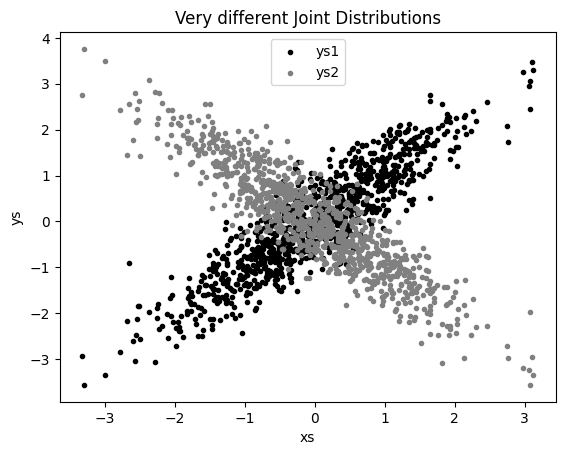

0.902738540739213
-0.9027610772391023


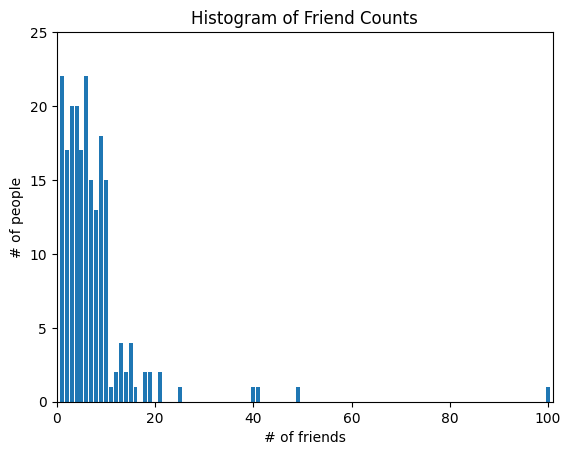

In [11]:
# EXPLORANDO DADOS EM DUAS DIMENSÕES

from probability import inverse_normal_cdf
import random
import matplotlib.pyplot as plt

def random_normal() -> float:
    """
        Retorna um ponto aleatório de uma distribuição normal padrão
    """
    return inverse_normal_cdf(random.random())

xs = [random_normal() for _ in range(1000)]
ys1 = [x + random_normal() / 2
       for x in xs]
ys2 = [-x + random_normal() / 2
       for x in xs]

plt.scatter(xs,
            ys1,
            marker = ".",
            color = "black",
            label = "ys1")
plt.scatter(xs,
            ys2,
            marker = ".",
            color = "gray",
            label = "ys2")

plt.xlabel("xs")
plt.ylabel("ys")

plt.legend(loc = 9)

plt.title("Very different Joint Distributions")

plt.show()

# correlação

from statistics import correlation

print(correlation(xs, ys1))
print(correlation(xs, ys2))

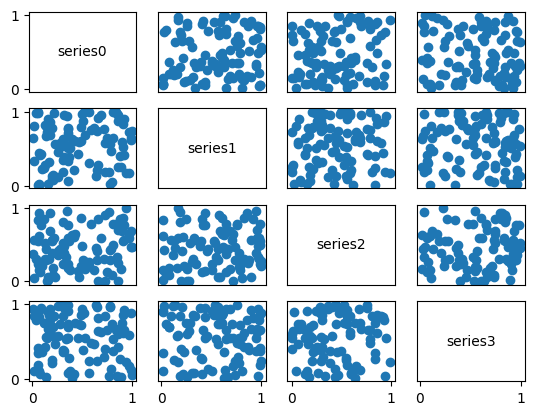

In [3]:
# EXPLORANDO DADOS EM MUITAS DIMENSÕES

from typing import List
from linear_algebra import Matrix, Vector, make_matrix
import matplotlib.pyplot as plt
import numpy as np

def correlation_matrix(data: List[Vector]) -> Matrix:
    """
        Retorna a matriz len(data)xlen(data), na qual (i, j) é a correlação entre data[i] e data[j]
    """
    def correlation_ij(i: int,
                       j: int) -> float:
        return correlation(data[i],
                           data[j])
    return make_matrix(len(data),
                       len(data),
                       correlation_ij)

corr_data = [np.random.rand(100),
             np.random.rand(100),
             np.random.rand(100),
             np.random.rand(100)
]

num_vectors = len(corr_data)
fig, ax = plt.subplots(num_vectors,
                       num_vectors)

for i in range(num_vectors):
    for j in range(num_vectors):

        # Disperse a column_j no eixo x e a column_i no eixo y
        if i != j:
            ax[i][j].scatter(corr_data[j],
                             corr_data[i])
        # a menos que i == j, nesse caso, mostre o nome da série
        else: 
            ax[i][j].annotate("series" + str(i),
                              (0.5, 0.5),
                              xycoords = "axes fraction",
                              ha = "center",
                              va = "center")
        # Em seguida, oculte os rótulos dos eixos, exceto pelos gráficos à esquerda e na parte inferior
        if i < num_vectors - 1:
            ax[i][j].xaxis.set_visible(False)
        if j > 0:
            ax[i][j].yaxis.set_visible(False)

# Corrija os rótulos dos eixos no canto superior esquerdo e no canto inferior direito, 
# pois só haverá texto nesses gráficos
ax[-1][-1].set_xlim(ax[0][-1].get_xlim())
ax[0][0].set_ylim(ax[0][1].get_ylim())

plt.show()

In [ ]:
# USANDO NAMEDTUPLES

import datetime

stock_price = {"closing_price": 103.06,
               "data": datetime.date(2014, 8, 29),
               "symbol": "AAPL"}

prices: Dict[datetime.date,
             float] = {}

from collections import namedtuple

StockPrice = namedtuple("StockPrice",
                        ["symbol",
                         "date",
                         "closing_price"])
price = StockPrice("MSFT",                          # symbol
                   datetime.date(2018, 12, 14),     # date
                   106.03)                          # closing_price

assert price.symbol == "MSFT"
assert price.closing_price == 106.03

from typing import NamedTuple

class StockPrice(NamedTuple):
    symbol: str
    date: datetime.date
    closing_price: float

    def is_high_tech(self) -> bool:
        """
            Como é uma classe, também podemos adicionar métodos
        """
        return self.symbol in ["MSFT", 
                               "GOOG", 
                               "FB", 
                               "AMZN",
                               "AAPL"]
    
price = StockPrice("MSFT",
                   datetime.date(2018, 12, 14),
                   106.03)

assert price.symbol == "MSFT"
assert price.closing_price == 106.03
assert price.is_high_tech()

In [3]:
# DATACLASSES - uma versão mutável das NamedTuple

from dataclasses import dataclass
import datetime

@dataclass
class StockPrice2:
    symbol: str
    date: datetime.date
    closing_price: float

    def is_high_tech(self) -> bool:
        """
            Como é uma classe, também podemos adicionar métodos.
        """
        return self.symbol in ["MSFT",
                               "GOOG",
                               "FB",
                               "AMZN",
                               "AAPL"]
    
price2 = StockPrice2("MSFT",
                     datetime.date(2018, 12, 14),
                     106.03)

assert price2.symbol == "MSFT"
assert price2.closing_price == 106.03
assert price2.is_high_tech()

In [ ]:
# LIMPANDO E ESTRUTURANDO

from dateutil.parser import parse

def parse_row(row: List[str]) -> StockPrice:
    symbol, date, closing_price = row
    return StockPrice(symbol = symbol,
                      date = parse(date).date(),
                      closing_price = float(closing_price))

stock = parse_row(["MSFT", "2018-12-14", "106.03"])

assert stock.symbol == "MSFT"
assert stock.date == datetime.date(2018, 12, 14)
assert stock.closing_price == 106.03

# e se houver um dado inválido?

from typing import Optional
import re

def try_parse_row(row: List[str]) -> Optional[StockPrice]:
    symbol, date_, closing_price_ = row
    # Os símbolos das ações devem estar em letra maiúsculas
    if not re.match(r"^[A-Z]+$", symbol):
        return None
    
    try:
        date = parse(date_).date()
    except ValueError:
        return None
    
    try:
        closing_price = float(closing_price_)
    except ValueError:
        return None
    
    return StockPrice(symbol, date, closing_price)

assert try_parse_row(["MSFT0", "2018-12-14", "106.03"]) is None
assert try_parse_row(["MSFT", "2018-12-14", "106.03"]) is None
assert try_parse_row(["MSFT", "2018-12-14", "x"]) is None
assert try_parse_row(["MSFT", "2018-12-14", "106.03"]) == stock

# se temos preços de ações delimitados por vírgulas com datos inválidos?

import csv

data: List[StockPrice] = []

with open("comma_delimited_stock_prices.csv") as f:
    reader = csv.reader(f)
    for row in reader:
        maybe_stock = try_parse_row(row)
        if maybe_stock is None:
            print(f"skipping invalid row: {row}")
        else: 
            data.append(maybe_stock)

In [3]:
# MANIPULANDO DADOS

import random
import datetime
from typing import NamedTuple

# construindo uma base de dados

data = []
empresas = ["AAPL", "FB", "AMZN", "TSLA", "MSFT"]
alfabeto = ["A", "B", "C", "D", "E", "F", "G", "H",
            "I", "J", "K", "L", "M", "N", "O", "P",
            "Q", "R", "S", "T", "U", "V", "W", "X",
            "Y", "Z"]

class StockPrice(NamedTuple):
    symbol: str
    date: datetime.date
    closing_price: float

for i in range(25):
    
    random.shuffle(empresas)

    data.append(
        StockPrice(
            empresas[0],
            datetime.date(
                2023, 
                random.randint(1,12), 
                random.randint(1,28)
                ),
            round(float(10*random.random()+100),2)
        )
    )

# desejamos determinar o maior preço de fechamento

max_aapl_price = max(stock_price.closing_price 
                     for stock_price in data)

# desejamos determinar o maior preço de fechamento de cada empresa

from collections import defaultdict
from typing import Dict

max_prices: Dict[str, float] = defaultdict(lambda: float("-inf"))

for sp in data:
    symbol, closing_price = sp.symbol, sp.closing_price
    if closing_price > max_prices[symbol]:
        max_prices[symbol] = closing_price

# agora, desejamos obter o percentual de variação dos preços no período de 1 dia

from typing import List

prices: Dict[str, List[StockPrice]] = defaultdict(list)
for sp in data:
    prices[sp.symbol].append(sp)

prices = {symbol: sorted(symbol_prices)
          for symbol, symbol_prices in prices.items()}

def pct_change(yesterday: StockPrice, today: StockPrice) -> float:
    return today.closing_price/yesterday.closing_price - 1

class DailyChange(NamedTuple):
    symbol: str
    date: datetime.date
    pct_change: float

def day_over_day_changes(prices: List[StockPrice]) -> List[DailyChange]:
    """
        Presume que os preços são de uma ação e estão classificados
    """
    return [DailyChange(symbol = today.symbol,
                        date = today.date,
                        pct_change = pct_change(yesterday, today))
                        for yesterday, today in zip(prices, prices[1:])]

all_changes = [change
               for symbol_prices in prices.values()
               for change in day_over_day_changes(symbol_prices)]

max_change = max(all_changes, key=lambda change: change.pct_change)
min_change = min(all_changes, key=lambda change: change.pct_change)

# Analisaremos agora o melhor mês para se investir em ações

changes_by_month: List[DailyChange] = {month: [] for month in range(1,13)}

for change in all_changes:
    changes_by_month[change.date.month].append(change)

avg_daily_change = {
    month: sum(change.pct_change for change in changes) / len(changes)
    for month, changes in changes_by_month.items()
}

In [ ]:
# REDIMENSIONAMENTO

"""
    Imaginemos que desejamos tirar informação de uma base de dados
    Colocando os dados em pares, como pontos de um grafico bidimensional
    """

alturas_pesos = [
    ["Pessoa", "Altura", "Peso"],
    ["A", 160, 150],
    ["B", 170.2, 160],
    ["C", 177.8, 171]
]

from linear_algebra import distance

a_to_b = distance([160, 150], [170.2, 160])
a_to_c = distance([160, 150], [150, 171])
b_to_c = distance([170.2, 160], [177.8, 171])

# O problema se dá quando as dimensões não são comparáveis

from typing import Tuple
from linear_algebra import vector_mean
from statistics import standard_deviation

def scale(data: List[Vector]) -> Tuple[Vector, Vector]:
    """Retorna a média e o desvio padrão de cada posição"""
    dim = len(data[0])
    means = vector_mean(data)
    stdevs = [standard_deviation([vector[i] for vector in data])
              for i in range(dim)]
    return means, stdevs

vectors = [
    [-3, -1, 1],
    [-1, 0, 1],
    [1, 1, 1]
]

means, stdevs = scale(vectors)

assert means == [-1, 0, 1]
assert stdevs == [2, 1, 0]

# agora, criaremos um novo conjunto de dados

def rescale(data: List[Vector]) -> List[Vector]:
    """
    Redimensiona os dados de entrada para que cada posição tenha média 0 e 
    desvio-padrão 1. (Deixa a posição como está se o desvio-padrão for 0)
    """

    dim = len(data[0])
    means, stdevs = scale(data)

    rescaled = [v[:] for v in data]

    for v in rescaled:
        for i in range(dim):
            if stdevs[i] > 0:
                v[i] = (v[i] - means[i])/stdevs[i]

    return rescaled

means, stdevs = scale(rescale(vectors))
assert means == [0, 0, 1]
assert stdevs == [1, 1, 0]

In [ ]:
# UM COMENTÁRIO : TQDM

"""
tqdm = barras de progresso personalizadas
https://www.geeksforgeeks.org/python-how-to-make-a-terminal-progress-bar-using-tqdm/
"""
import tqdm

for i in tqdm.tqdm(range(100)):
    _ = [random.random() for _ in range(1000000)]

from typing import List

def primes_up_to(n: int) -> List[int]:
    primes = [2]

    with tqdm.trange(3, n) as t:
        for i in t:
            i_is_prime = not any(i % p == 0 for p in primes)
            if i_is_prime:
                primes.append(i)
            
            t.set_description(f"{len(primes)} primes")

    return primes

my_primes = primes_up_to(100_000)

In [ ]:
# REDUÇÃO DE DIMENSIONALIDADE

# transformaremos os dados para que cada dimensão possua média 0

from linear_algebra import subtract
from typing import List

def de_mean(data: List[Vector]) -> List[Vector]:
    """
    Centraliza novamente os dados para que todas as dimensões tenham média 0
    """
    mean = vector_mean(data)
    return [subtract(vector, mean) for vector in data]

# para uma matriz com média redefinida, queremos a direção que captura a maior variação nos dados

from linear_algebra import magnitude

def direction(w: Vector) -> Vector:
    mag = magnitude(w)
    return [w_i / mag for w_i in w]

# calculamos a variação do conjunto de dados na direção determinada

from linear_algebra import dot

def directional_variance (data: List[Vector], w: Vector) -> float:
    """
    Retorna a variação de x na direção de w
    """
    w_dir = direction(w)
    return sum(dot(v, w_dir) ** 2 for v in data)

# agora desejamos obter a direção que maximiza a variação

def directional_variance_gradient(data: List[Vector], w: Vector) -> Vector:
    """
    O gradiente da variação direcional em relação a w
    """
    w_dir = direction(w)
    return [sum(2*dot(v, w_dir) * v[i] for v in data)
            for i in range(len(w))]

from gradient_descent import gradient_step
import tqdm

def first_principal_componente(data: List[Vector], n: int = 100, step_size: float = 0.1) -> Vector:
    # um valor de chute
    guess = [1.0 for _ in data[0]]

    with tqdm.trange(n) as t:
        for _ in t:
            dv = directional_variance(data, guess)
            gradient = directional_variance_gradient(data, guess)
            guess = gradient_step(guess, gradient, step_size)
            t.set_description(f"dv: {dv:.3f}")
    
    return direction(guess)

# projetaremos os dados na direção encontrada

from linear_algebra import scalar_multiply

def project(v: Vector, w: Vector) -> Vector:
    """
    Retorne a projeção de v na direção w
    """
    projection_length = dot(v, w)
    return scalar_multiply(projection_length, w)

# para encontrar mais componentes precisamos remover as projeções

def remove_projection_from_vector(v: Vector, w: Vector) -> Vector:
    """
    Projeto v em w e subtrai o resultado de v
    """
    return subtract(v, project(v, w))

def remove_projection(data: List[Vector], w: Vector) -> List[Vector]:
    return [remove_projection_from_vector(v, w) for v in data]

# a partir deste ponto, a estrutura restante será unidimensional
# para encontrar o próximo componente importante, repetimos o processo

def pca(data: List[Vector], num_components: int) -> List[Vector]:
    components: List[Vector] = []
    for _ in range(num_components):
        component = first_principal_componente(data)
        components.append(component)
        data = remove_projection(data, component)

    return components

# depois, transformamos os dados no espaço com menos dimensões criado pelos componentes

def transform_vector(v: Vector, components: List[Vector]) -> Vector:
    return [dot(v, w) for w in components]

def transform(data: List[Vector], components: List[Vector]) -> Vector:
    return [transform_vector(v, components) for v in data]

# O scikit-learn possui várias funções para decomposição de matrizes
# https://scikit-learn.org/stable/modules/classes.html#module-sklearn.decomposition